# The ε-Greedy k-Arm Bandit Problem

## Problem Setup
The ε-greedy k-arm bandit problem is a classic reinforcement learning scenario that illustrates the **exploration vs. exploitation** trade-off. The setup involves:

- **k arms**: Imagine a slot machine with k levers, each providing rewards from an unknown probability distribution.
- **Objective**: Maximize the cumulative reward over a sequence of arm pulls.

## ε-Greedy Algorithm

### 1. Initialization
- Initialize an **estimated reward** $ Q(a) = 0 $ for each arm $ a $ where $ a  \in \{1, 2, ..., k\}$ .
- Maintain a **count** $ N(a) $ of how many times each arm has been pulled.

### 2. Action Selection
At each step:

- With probability **ε**, choose a random arm (**exploration**).
- With probability **1-ε**, choose the arm with the **highest estimated reward** $ Q(a) $ (**exploitation**).

### 3. Reward & Update
After pulling an arm and receiving a reward $ r $:

$$
Q(a) = \left(\frac{n-1}{n}\right) Q(a) + \left(\frac{1}{n}\right) r
$$

where $ N(a) $ is the count of selections of arm $ a $.

## Key Concepts
- **Exploration (ε chance)**: Randomly selects an arm to gather more information about the reward distribution.
- **Exploitation (1-ε chance)**: Selects the arm with the highest estimated reward to maximize immediate gain.

### Practical Example: ***Bandits Trade Stocks***

This notebook implements a simple implementation of the k-arm bandit probelm. Cummulative rewards are added daily and simulate holding a stock for 1 day. The performance of this strategy has been compared with 100 random implementations of the strategy.

The results obtained for the period start_date = '2015-01-01', end_date = '2024-12-31 are statistically significant at a $\alpha=0.005$ significance level compared to the alternative hypothesis (picking the stocks at random).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Export data

import yfinance as yf

# Replicability

np.random.seed(42)

In [2]:
# Stock Selection and Dates

stocks = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'TSLA', 'NVDA', 'JPM', 'JNJ', 'WMT']

start_date = '2015-01-01'
end_date = '2024-12-31'

In [3]:
# Data extraction

data = yf.download(stocks, start=start_date, end=end_date)['Close']
data = data.dropna()
# Calculate daily returns
returns = data.pct_change().shift(-1)[:-1]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


In [4]:
# If you do not get a dataset try:

# pip uninstall yfinance
# pip uninstall pandas-datareader
# pip install yfinance --upgrade --no-cache-dir
# pip install pandas-datareader

returns

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,WMT
Date,,,,,,,,,,
2015-01-02,-0.028172,-0.020517,-0.020846,-0.006984,-0.031045,-0.016061,-0.009196,-0.016890,-0.042041,-0.002910
2015-01-05,0.000094,-0.022833,-0.023177,-0.004914,-0.025929,-0.013473,-0.014677,-0.030318,0.005664,0.007706
2015-01-06,0.014022,0.010600,-0.001713,0.022075,0.001526,0.000000,0.012705,-0.002606,-0.001562,0.026532
2015-01-07,0.038422,0.006836,0.003153,0.007863,0.022346,0.026658,0.029419,0.037618,-0.001564,0.021106
2015-01-08,0.001073,-0.011749,-0.012950,-0.013629,-0.017387,-0.005628,-0.008405,0.004028,-0.018802,-0.012380
...,...,...,...,...,...,...,...,...,...,...
2024-12-20,0.003065,0.000622,0.015703,0.005538,0.003325,0.024947,-0.003092,0.036897,0.022657,-0.020490
2024-12-23,0.011478,0.017729,0.008062,0.003993,0.016444,0.013170,0.009374,0.003938,0.073572,0.025789
2024-12-24,0.003176,-0.008732,-0.002379,-0.001851,0.003425,-0.007240,-0.002777,-0.002068,-0.017630,0.001187


In [5]:
# ε-greedy bandit algorithm
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon):
        self.n = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm has been pulled
        self.values = np.zeros(n_arms)  # Estimated value for each arm

    def select_arm(self):
        if np.random.rand() > self.epsilon:
            # Exploition: Select max arg
            return np.argmax(self.values) # Returns the index of first occurrenct of the highest value
        else:
            # Exploration: random selection

            # num = np.random.randint(10)
            # Random integer from 0 to 9
            return np.random.randint(0, self.n)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Update the estimated value
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

In [6]:
# Initial Parameters
epsilon = 0.1
n_arms = len(stocks)
bandit = EpsilonGreedyBandit(n_arms, epsilon)

# Bandit simulation data
num_days = len(returns)
cumulative_rewards_bandit = []
total_reward_bandit = 0
daily_rewards_bandit = []
chosen_arms_bandit = []

In [7]:
# Simulation

for t in range(num_days):
    # Select an arm
    arm = bandit.select_arm()
    chosen_arms_bandit.append(arm)
    
    # Get the reward
    reward = returns.iloc[t, arm]  # Return on day t for give stock
    
    # Update the bandit with observed reward
    bandit.update(arm, reward)
    
    # Update total and cumulative rewards
    total_reward_bandit += reward
    daily_rewards_bandit.append(reward)
    cumulative_rewards_bandit.append(total_reward_bandit)

In [8]:
# Simulate 100 random strategies
num_strategies = 100
cumulative_rewards_random = np.zeros((num_strategies, num_days))

for s in range(num_strategies):
    total_reward_random = 0
    cumulative_reward = []
    for t in range(num_days):
        arm = np.random.randint(0, n_arms)
        reward = returns.iloc[t, arm]
        reward = np.nan_to_num(reward)
        total_reward_random += reward
        cumulative_reward.append(total_reward_random)
    cumulative_rewards_random[s] = cumulative_reward

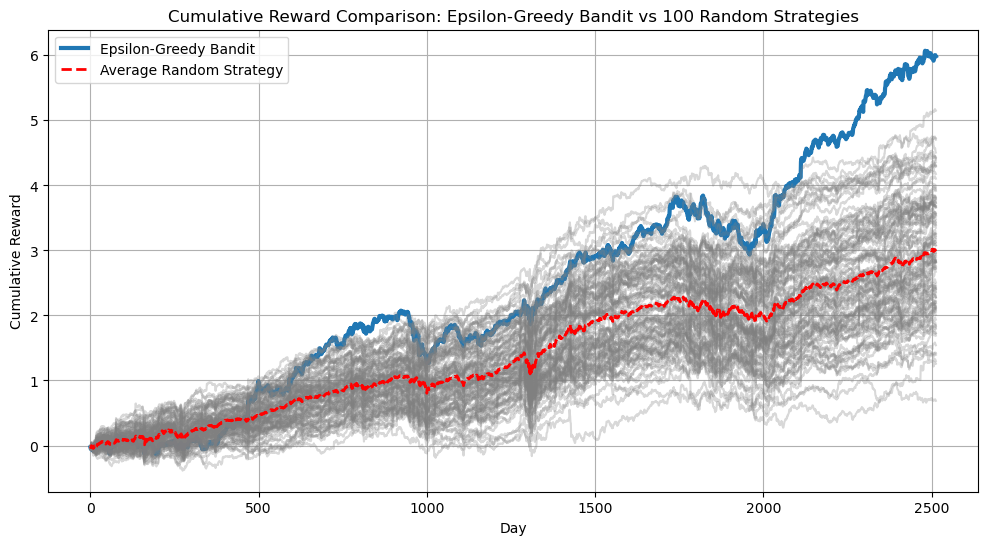

In [9]:
# Plot bandit cumulative rewards 
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards_bandit, label='Epsilon-Greedy Bandit', linewidth=3)

# Plot random strategy cumulative rewards
for s in range(num_strategies):
    plt.plot(cumulative_rewards_random[s], color='grey', alpha=0.3)

# Calculate and plot average of random strategies
average_random = np.mean(cumulative_rewards_random, axis=0)
plt.plot(average_random, label='Average Random Strategy', color='red', linestyle='--', linewidth=2)

plt.xlabel('Day')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Comparison: Epsilon-Greedy Bandit vs 100 Random Strategies')
plt.legend()
plt.grid(True)
plt.show()

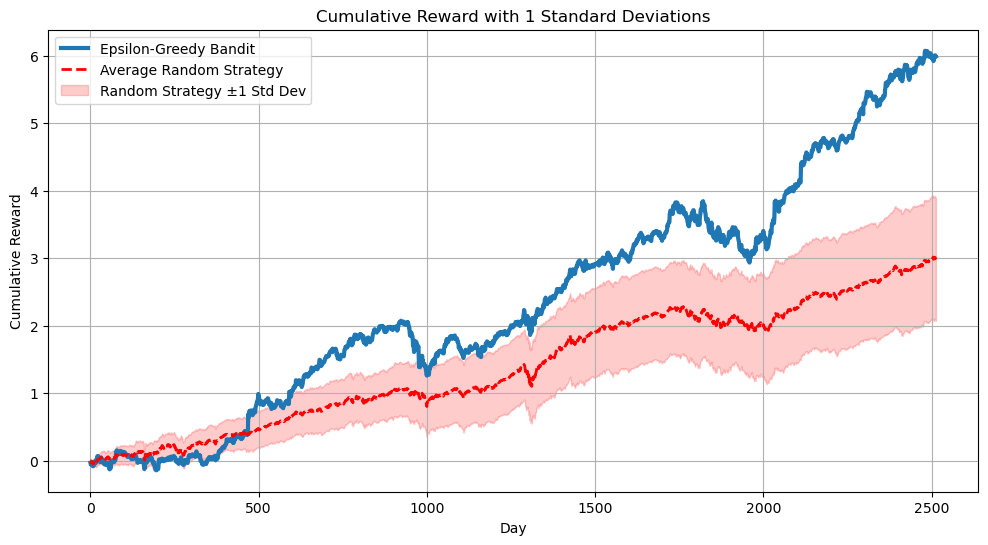

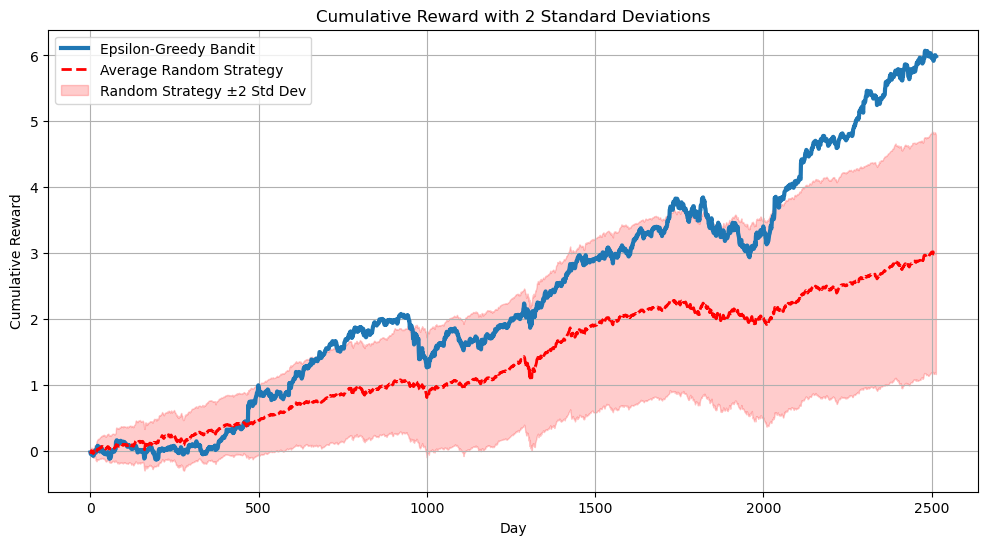

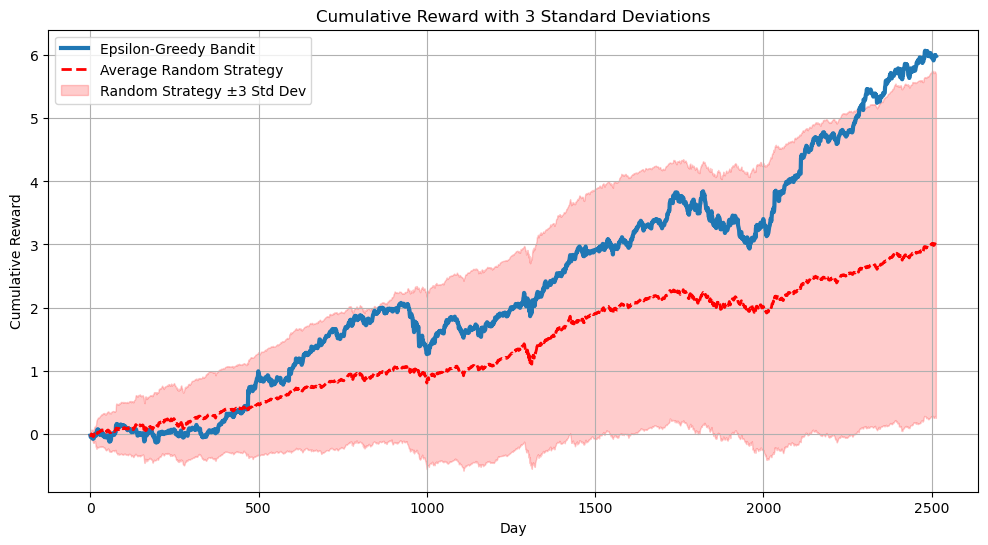

In [10]:
average_random = np.mean(cumulative_rewards_random, axis=0)
std_random = np.std(cumulative_rewards_random, axis=0)

num_std_random = [1,2,3]

for num in num_std_random:
    # Plot cumulative rewards
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_rewards_bandit, label='Epsilon-Greedy Bandit', linewidth=3)

    # Plot average cumulative rewards of random
    plt.plot(average_random, label='Average Random Strategy', color='red', linestyle='--', linewidth=2)

    # Plot "num" standard deviation bands around avg
    plt.fill_between(range(num_days),
                     average_random - num * std_random,
                     average_random + num * std_random,
                     color='red', alpha=0.2, label=f'Random Strategy ±{num} Std Dev')

    plt.xlabel('Day')
    plt.ylabel('Cumulative Reward')
    plt.title(f'Cumulative Reward with {num} Standard Deviations')
    plt.legend()
    plt.grid(True)
    plt.show()

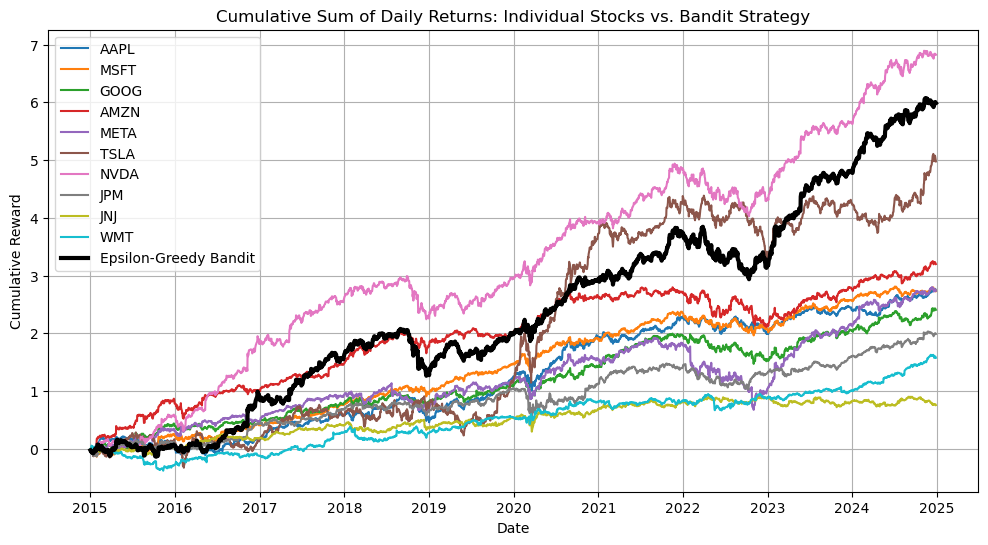

In [11]:
# Comparison with stock returns

# Calculate cumulative sum of daily returns for each stock
cumulative_rewards_stocks = returns.cumsum()

plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(cumulative_rewards_stocks.index, cumulative_rewards_stocks[stock], label=stock)

# Plot the cumulative rewards of the ε-greedy bandit
plt.plot(cumulative_rewards_stocks.index, cumulative_rewards_bandit, label='Epsilon-Greedy Bandit', linewidth=3, color='black')

plt.xlabel('Date')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Sum of Daily Returns: Individual Stocks vs. Bandit Strategy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
correlation_matrix = np.corrcoef(cumulative_rewards_bandit, cumulative_rewards_stocks['NVDA'])
correlation = correlation_matrix[0, 1]
print(f"Correlation: {correlation}")

Correlation: 0.9914547743606116


## Question 1: Experimenting with Time Periods and ε Values  

Your current ε-greedy algorithm trades 10 stocks with a **constant ε**. Let's explore how different strategies perform over varying time periods and ε settings.  

### **Instructions:**  
1. **Set Up Different Scenarios:**  
   - Choose at least **three different ε values** (e.g., 0.1, 0.5, 0.9).  
   - You can also try using a different set of stocks.
   - Run the algorithm for different time periods.  

2. **Track Stock Selection:**  
   - For each scenario, create a plot showing **how often each stock is selected over time**.  
   - Compare the selection patterns across different ε values and time periods.  

3. **Analyze the Results:**  
   - How does the choice of ε affect the balance between exploration and exploitation in short vs. long-term scenarios?  
   - Do certain stocks consistently dominate in selection? Why might this be the case?  
   - What happens to exploration when ε is high in the long term?  

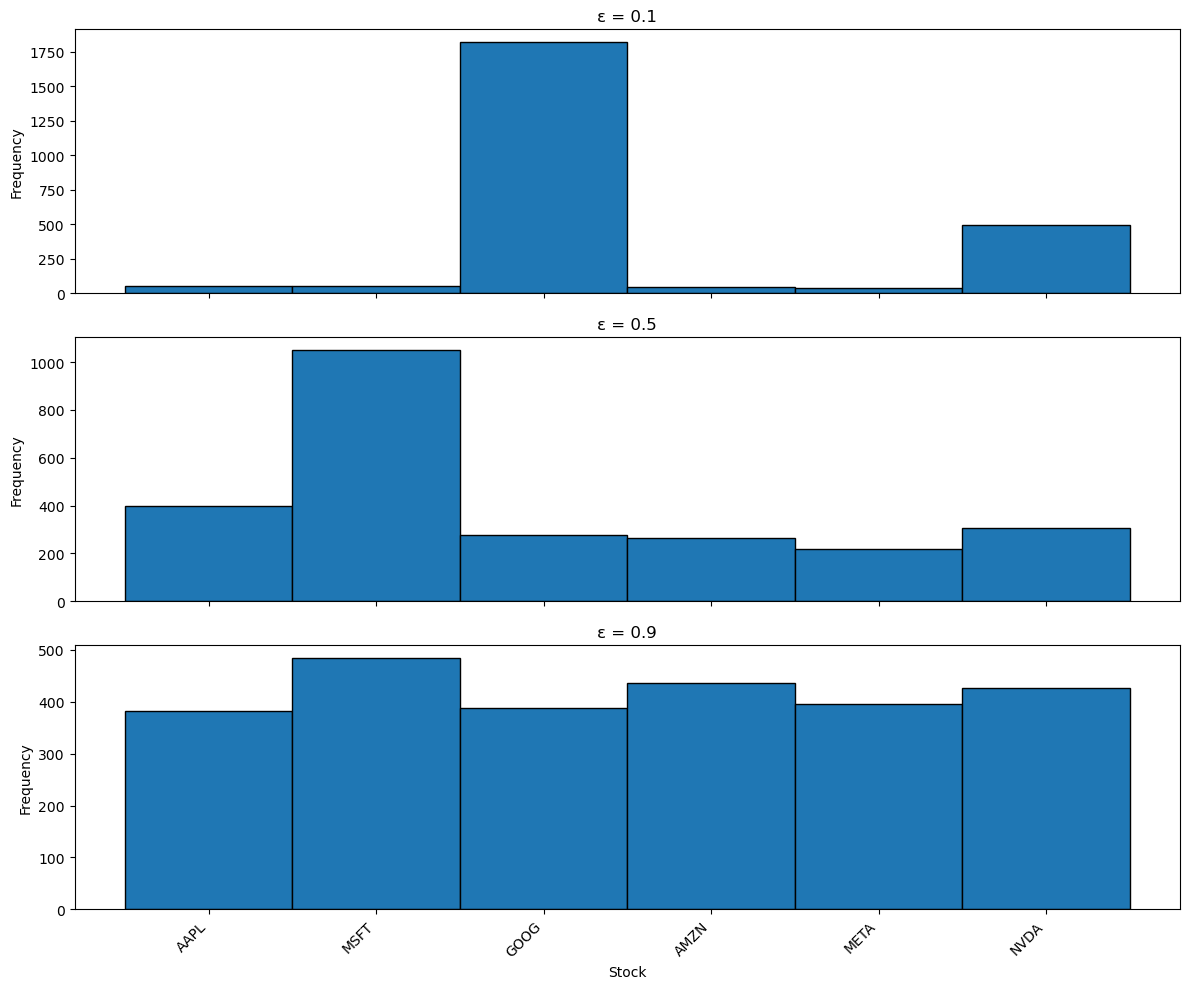

In [13]:
# Stock Selection and Dates

stocks = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'NVDA']

start_date = '2020-01-01'
end_date = '2024-12-31'


# Run simulations for different ε values
epsilons = [0.1, 0.5, 0.9]
selection_history = {}

for epsilon in epsilons:
    bandit = EpsilonGreedyBandit(len(stocks), epsilon)
    chosen_arms = []

    for t in range(len(returns)):
        arm = bandit.select_arm()
        reward = returns.iloc[t, arm]
        bandit.update(arm, reward)
        chosen_arms.append(arm)

    selection_history[epsilon] = chosen_arms

# Plot stock selection frequencies
fig, axs = plt.subplots(len(epsilons), 1, figsize=(12, 10), sharex=True)

for i, epsilon in enumerate(epsilons):
    chosen_arms = selection_history[epsilon]
    axs[i].hist(chosen_arms, bins=np.arange(len(stocks)+1)-0.5, edgecolor='black')
    axs[i].set_title(f"ε = {epsilon}")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xticks(range(len(stocks)))
    axs[i].set_xticklabels(stocks, rotation=45, ha="right")

axs[-1].set_xlabel("Stock")
plt.tight_layout()
plt.show()


### 3-1. How does the choice of ε affect the balance between exploration and exploitation?

- From the top histogram (ε = 0.1), GOOG is selected over 1750 times, while the other stocks are barely chosen 

    - This reflects strong exploitation behaviour

        - The agent likely identified GOOG as the best option early and then almost completely stopped exploring alternatives
    
- In contrast, the bottom histogram (ε = 0.9) shows that all six stocks are selected relatively evenly, with counts ranging roughly between 350 and 480

    - This indicates the agent is exploring heavily even in the long run, not committing to any single choice

- The middle histogram (ε = 0.5) presents a balance: MSFT dominates with around 1060 selections, but the remaining stocks are still explored to a greater extent than in ε = 0.1

    - This suggests that at ε = 0.5, the agent initially explores before settling into exploitation, showing a smoother trade-off between the two behaviours

<br>

### 3-2. Do certain stocks consistently dominate in selection? Why might this be the case?

Yes

- In both the ε = 0.1 and ε = 0.5 histograms, one stock dominates selection

    - For ε = 0.1, GOOG vastly outweighs all others, while in ε = 0.5, it's MSFT
    
        - These stocks likely had higher early returns in the simulation
        
        - With low ε, the algorithm quickly commits to what initially seems best, reinforcing that choice through exploitation

- In the ε = 0.9 graph, no single stock dominates

    - All stocks are selected at a relatively similar frequency, suggesting that no matter how well one stock performs, the agent continues to explore others due to the high exploration rate
    
        - This shows that high ε prevents domination but may delay convergence to the optimal choice

<br>

### 3-3. What happens to exploration when ε is high in the long term?

- In the ε = 0.9 histogram, all six stocks are selected fairly uniformly

    - This is a clear sign of persistent exploration
    
        - Even if one stock had superior returns, the algorithm did not favour it heavily
        
        - Instead, every option was explored consistently, as shown by the relatively flat bar distribution

            - This persistent exploration avoids early bias but also means the agent doesn't fully exploit the best-performing option
                
    - The graph confirms that with high ε, exploration dominates even over extended periods, and the agent sacrifices reward maximisation for continued sampling

<br>


## Question 2: Implementing an Adaptive ε Strategy
Currently, ε remains constant in your algorithm. Your task is to modify the code to implement an adaptive ε strategy, where ε decreases over time. For example, consider using the update rule:

$$\epsilon = \frac{1}{1 + n}$$

where $n$ is the number of trading iterations.

Tasks:
- Update your implementation to incorporate this adaptive ε strategy.
- Describe or visualize how the decreasing ε influences the decision-making process (i.e., the balance between exploration and exploitation) as trading progresses.

What are the negative side effects of using this rule? Can you come up with a better way of updating epsilon?

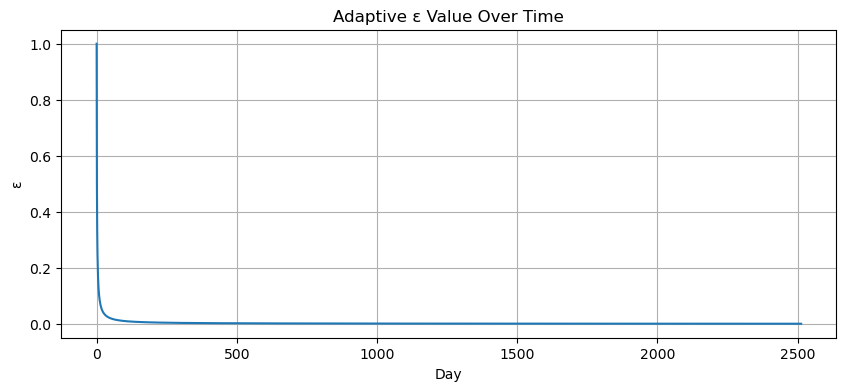

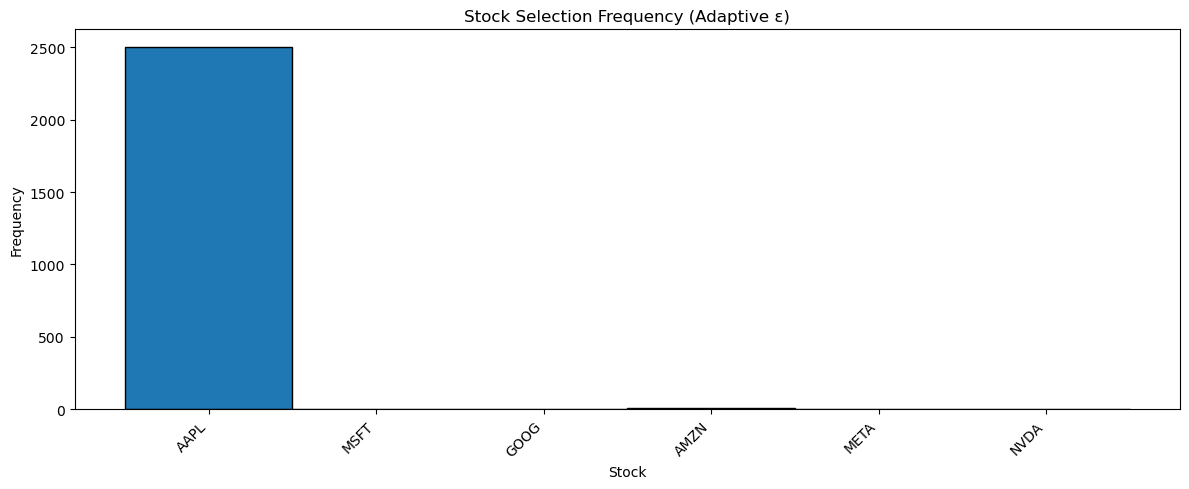

In [14]:
class AdaptiveEpsilonGreedyBandit:
    def __init__(self, n_arms):
        self.n = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_iterations = 0  # n

    def epsilon(self):
        return 1 / (1 + self.total_iterations)

    def select_arm(self):
        eps = self.epsilon()
        if np.random.rand() > eps:
            return np.argmax(self.values)  # Exploitation
        else:
            return np.random.randint(0, self.n)  # Exploration

    def update(self, chosen_arm, reward):
        self.total_iterations += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Initialise the bandit with adaptive ε
bandit_adaptive = AdaptiveEpsilonGreedyBandit(len(stocks))
chosen_arms = []
epsilon_values = []

# Run the simulation across all trading days
for t in range(len(returns)):
    epsilon_values.append(bandit_adaptive.epsilon())
    arm = bandit_adaptive.select_arm()
    reward = returns.iloc[t, arm]
    bandit_adaptive.update(arm, reward)
    chosen_arms.append(arm)

# Plot ε over time
plt.figure(figsize=(10, 4))
plt.plot(epsilon_values)
plt.title("Adaptive ε Value Over Time")
plt.xlabel("Day")
plt.ylabel("ε")
plt.grid(True)
plt.show()

# Plot selection frequency
plt.figure(figsize=(12, 5))
plt.hist(chosen_arms, bins=np.arange(len(stocks)+1)-0.5, edgecolor='black')
plt.title("Stock Selection Frequency (Adaptive ε)")
plt.xlabel("Stock")
plt.ylabel("Frequency")
plt.xticks(range(len(stocks)), stocks, rotation=45, ha="right")
plt.tight_layout()
plt.show()



<br>

### How does decreasing ε influence decision-making?

- The first graph shows how ε changes over time:

    - ε starts at 1.0 (maximum exploration) and drops very sharply, approaching zero within the first few hundred iterations

        - This rapid decay leads the agent to stop exploring early, transitioning almost entirely to exploitation for the majority of the trading period

- This effect is clearly reflected in the second graph:

    - AAPL dominates almost all selections (~2,500 times), while the rest of the stocks are barely chosen

        - This means the agent likely observed strong early returns from AAPL and locked into exploiting it, ignoring potentially better-performing stocks that could have surfaced with more sustained exploration

In essence, the decreasing ε heavily influences the balance:

> High exploration at the start, but very quick shift to exploitation — too quick to adapt meaningfully over time

<br>

Negative side effects of this $ε = \frac{1}{1 + n}$ rule:

- Exploration decays too fast

    - The sharp drop in ε limits the agent’s ability to correct early mistakes

    - If a suboptimal arm (like AAPL) looks best in the first few rounds, the agent becomes biased toward it

- No late-stage adaptation

    - Once ε becomes very small, exploration is almost completely turned off

    - This makes the agent rigid and blind to changes or long-term patterns in stock behaviour

<br>

### A better way to update  ε

- Using exponential decay

<br>



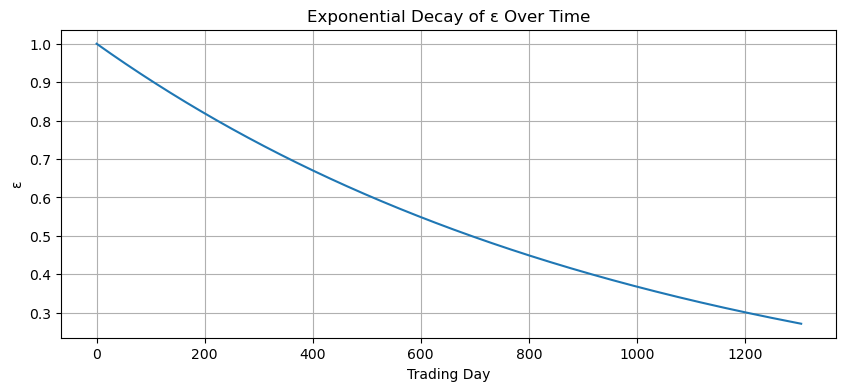

In [15]:
# Define date range
start_date = '2020-01-01'
end_date = '2024-12-31'

# Generate a range of business (trading) days
trading_days = pd.bdate_range(start=start_date, end=end_date)
num_days = len(trading_days)

# Parameters for exponential decay
epsilon_0 = 1.0
decay_rate = 0.001

# Compute ε values for each trading day
epsilons = [epsilon_0 * np.exp(-decay_rate * t) for t in range(num_days)]

# Plot ε over time
plt.figure(figsize=(10, 4))
plt.plot(epsilons)
plt.title("Exponential Decay of ε Over Time")
plt.xlabel("Trading Day")
plt.ylabel("ε")
plt.grid(True)
plt.show()

<br>

- Observation:

    - ε starts at 1.0, ensuring full exploration at the beginning

        - It decays smoothly and gradually, reaching around 0.27 by the final trading day

        - This avoids the sharp drop in ε seen in the $\frac{1}{1+n}$ rule, where exploration nearly stops after just a few hundred steps.

- Why this is better

1. Controlled decay

    - The decay is gentle, giving the agent more time to explore and collect better estimates before exploiting

    - The smooth curve prevents abrupt behavioural shifts that might lead to premature commitment

2. Tunable behaviour

    - One can adjust decay_rate to control how fast exploration fades, adapting to different time horizons or environments

        - For example, reducing the rate to 0.0005 would maintain exploration longer in a longer-term scenario

3. Still explores at the end

    - Unlike the original rule where ε approaches zero too fast, here ε is still ~0.27 after 1,260 trading days, maintaining some level of exploration